In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [69]:
file_path = './Dataset/Smart_Home_Dataset_with_weather_Information.csv'
df = pd.read_csv(file_path)

# Remove the last row of the dfframe
df = df.iloc[:-1]

# Convert the 'time' column from UNIX timestamp to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 00:00', periods=len(df),  freq='min'))
# add 12 hours to all times
df['time'] = df['time'] + pd.Timedelta(hours=12)
df.set_index('time', inplace=True)

df.head()

/var/folders/dq/556hp6s51yl7mqkv6kq_68s40000gn/T/ipykernel_39013/2264395419.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
time                                                                           
2016-01-01 12:00:00  0.932833  0.003483            0.932833         0.000033   
2016-01-01 12:01:00  0.934333  0.003467            0.934333         0.000000   
2016-01-01 12:02:00  0.931817  0.003467            0.931817         0.000017   
2016-01-01 12:03:00  1.022050  0.003483            1.022050         0.000017   
2016-01-01 12:04:00  1.139400  0.003467            1.139400         0.000133   

                     Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
time                                                                    
2016-01-01 12:00:00        0.020700        0.061917          0.442633   
2016-01-01 12:01:00        0.020717        0.063817          0.444067   
2016-01-01 12:02:00        0.020700        0.062317          0.446067   
2016-01-01 12:03:00        0.106900        0.068517          0.446583   
2016-01-01 12:04:00        0.236933        0.063983          0.446533   

                     Fridge [kW]  Wine cellar [kW]  Garage door [kW]  ...  \
time                                                                  ...   
2016-01-01 12:00:00     0.124150          0.006983          0.013083  ...   
2016-01-01 12:01:00     0.124000          0.006983          0.013117  ...   
2016-01-01 12:02:00     0.123533          0.006983          0.013083  ...   
2016-01-01 12:03:00     0.123133          0.006983          0.013000  ...   
2016-01-01 12:04:00     0.122850          0.006850          0.012783  ...   

                     visibility  summary  apparentTemperature  pressure  \
time                                                                      
2016-01-01 12:00:00        10.0    Clear                29.26   1016.91   
2016-01-01 12:01:00        10.0    Clear                29.26   1016.91   
2016-01-01 12:02:00        10.0    Clear                29.26   1016.91   
2016-01-01 12:03:00        10.0    Clear                29.26   1016.91   
2016-01-01 12:04:00        10.0    Clear                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 12:00:00       9.18  cloudCover        282.0              0.0   
2016-01-01 12:01:00       9.18  cloudCover        282.0              0.0   
2016-01-01 12:02:00       9.18  cloudCover        282.0              0.0   
2016-01-01 12:03:00       9.18  cloudCover        282.0              0.0   
2016-01-01 12:04:00       9.18  cloudCover        282.0              0.0   

                     dewPoint precipProbability  
time                                             
2016-01-01 12:00:00      24.4               0.0  
2016-01-01 12:01:00      24.4               0.0  
2016-01-01 12:02:00      24.4               0.0  
2016-01-01 12:03:00      24.4               0.0  
2016-01-01 12:04:00      24.4               0.0  

[5 rows x 31 columns]

# Cleaning

In [70]:
# replace the string cloudCover with the mean value
df['cloudCover'] = df['cloudCover'].replace('cloudCover', None)
# Convert the cloudCover column to a float
df['cloudCover'] = df['cloudCover'].astype(float)
# replace nan values with the mean of the column
df['cloudCover'] = df['cloudCover'].fillna(df['cloudCover'].mean())
# View the different strings in cloudCover
df['cloudCover'].unique()

array([0.22588514, 0.75      , 0.        , 1.        , 0.31      ,
       0.44      , 0.13      , 0.19      , 0.25      , 0.16      ,
       0.21      , 0.15      , 0.14      , 0.27      , 0.28      ,
       0.17      , 0.05      , 0.1       , 0.26      , 0.29      ,
       0.11      , 0.09      , 0.12      , 0.06      , 0.02      ,
       0.08      , 0.04      , 0.35      , 0.22      , 0.23      ,
       0.54      , 0.39      , 0.03      , 0.07      , 0.76      ,
       0.62      , 0.18      , 0.79      , 0.48      , 0.24      ,
       0.57      , 0.41      , 0.78      , 0.2       , 0.77      ,
       0.46      , 0.55      , 0.01      , 0.51      , 0.47      ,
       0.5       , 0.4       , 0.3       , 0.43      , 0.33      ,
       0.6       , 0.68      , 0.66      , 0.45      , 0.34      ,
       0.52      , 0.67      , 0.49      , 0.37      , 0.36      ,
       0.61      , 0.38      , 0.42      , 0.53      , 0.63      ,
       0.32      , 0.56      , 0.58      , 0.72      , 0.73   

In [71]:
# show the values of summary
print(df['summary'].unique())
df['summary_encoded'] = pd.factorize(df['summary'])[0]
print(df['summary_encoded'].unique())

# drop the summary column
df = df.drop(columns='summary')

['Clear' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy' 'Drizzle' 'Light Rain'
 'Rain' 'Light Snow' 'Flurries' 'Breezy' 'Snow' 'Rain and Breezy' 'Foggy'
 'Breezy and Mostly Cloudy' 'Breezy and Partly Cloudy'
 'Flurries and Breezy' 'Dry' 'Heavy Snow']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [72]:
print(df['icon'].unique())
df['icon_encoded'] = pd.factorize(df['icon'])[0]
print(df['icon_encoded'].unique())

# drop the icon column
df = df.drop(columns='icon')

['clear-night' 'partly-cloudy-night' 'clear-day' 'cloudy'
 'partly-cloudy-day' 'rain' 'snow' 'wind' 'fog']
[0 1 2 3 4 5 6 7 8]


In [73]:
df.describe()

use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.000017        0.000067          0.000083       0.000067   
25%          0.020233        0.064400          0.040383       0.005083   
50%          0.020617        0.066633          0.042217       0.005433   
75%          0.068733        0.080633          0.068283       0.125417   
max          1.934083        0.794933          0.971750       0.851267   

       Wine cellar [kW]  Garage door [kW]  ...  apparentTemperature  \
count     503910.000000     503910.000000  ...        503910.000000   
mean           0.042137          0.014139  ...            48.263382   
std            0.057967          0.014292  ...            22.027916   
min            0.000017          0.000017  ...           -32.080000   
25%            0.007133          0.012733  ...            31.090000   
50%            0.008083          0.012933  ...            50.320000   
75%            0.053192          0.013100  ...            66.260000   
max            1.273933          1.088983  ...           101.120000   

            pressure      windSpeed     cloudCover    windBearing  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean     1016.301625       6.649936       0.225885     202.356843   
std         7.895185       3.982716       0.289890     106.520474   
min       986.400000       0.000000       0.000000       0.000000   
25%      1011.290000       3.660000       0.040000     148.000000   
50%      1016.530000       5.930000       0.120000     208.000000   
75%      1021.480000       8.940000       0.290000     295.000000   
max      1042.460000      22.910000       1.000000     359.000000   

       precipIntensity       dewPoint  precipProbability  summary_encoded  \
count    503910.000000  503910.000000      503910.000000    503910.000000   
mean          0.002598      38.694013           0.056453         1.026771   
std           0.011257      19.087939           0.165836         2.054667   
min           0.000000     -27.240000           0.000000         0.000000   
25%           0.000000      24.600000           0.000000         0.000000   
50%           0.000000      39.030000           0.000000         0.000000   
75%           0.000000      54.790000           0.000000         1.000000   
max           0.191000      75.490000           0.840000        17.000000   

        icon_encoded  
count  503910.000000  
mean        1.696803  
std         1.744335  
min         0.000000  
25%         0.000000  
50%         2.000000  
75%         2.000000  
max         8.000000  

[8 rows x 31 columns]

In [74]:
df.isnull().sum()

use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
humidity               0
visibility             0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
summary_encoded        0
icon_encoded           0
dtype: int64

In [75]:
df.dtypes

use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
humidity               float64
visibility             float64
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover             float64
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
summary_encoded          int64
icon_encoded             int64
dtype: object

In [76]:
# Print the total rows with null values
print(df.isnull().sum().sum())

# Fill the null values with the forward fill method
df.fillna(method='ffill', inplace=True)

0


In [77]:
# Power-related columns
power_array = [
    'use [kW]', 
    'gen [kW]', 
    'House overall [kW]', 
    'Dishwasher [kW]', 
    'Furnace 1 [kW]', 
    'Furnace 2 [kW]', 
    'Home office [kW]', 
    'Fridge [kW]', 
    'Wine cellar [kW]', 
    'Garage door [kW]', 
    'Kitchen 12 [kW]', 
    'Kitchen 14 [kW]', 
    'Kitchen 38 [kW]', 
    'Barn [kW]', 
    'Well [kW]', 
    'Microwave [kW]', 
    'Living room [kW]', 
    'Solar [kW]'
]

# Weather-related columns
weather_array = [
    'temperature', 
    # 'icon', 
    'icon_encoded',
    'humidity', 
    'visibility', 
    # 'summary', 
    'summary_encoded',
    'apparentTemperature', 
    'pressure', 
    'windSpeed', 
    'cloudCover', 
    'windBearing', 
    'precipIntensity', 
    'dewPoint', 
    'precipProbability'
]

# all columns
all_columns = power_array + weather_array


# View the correlations

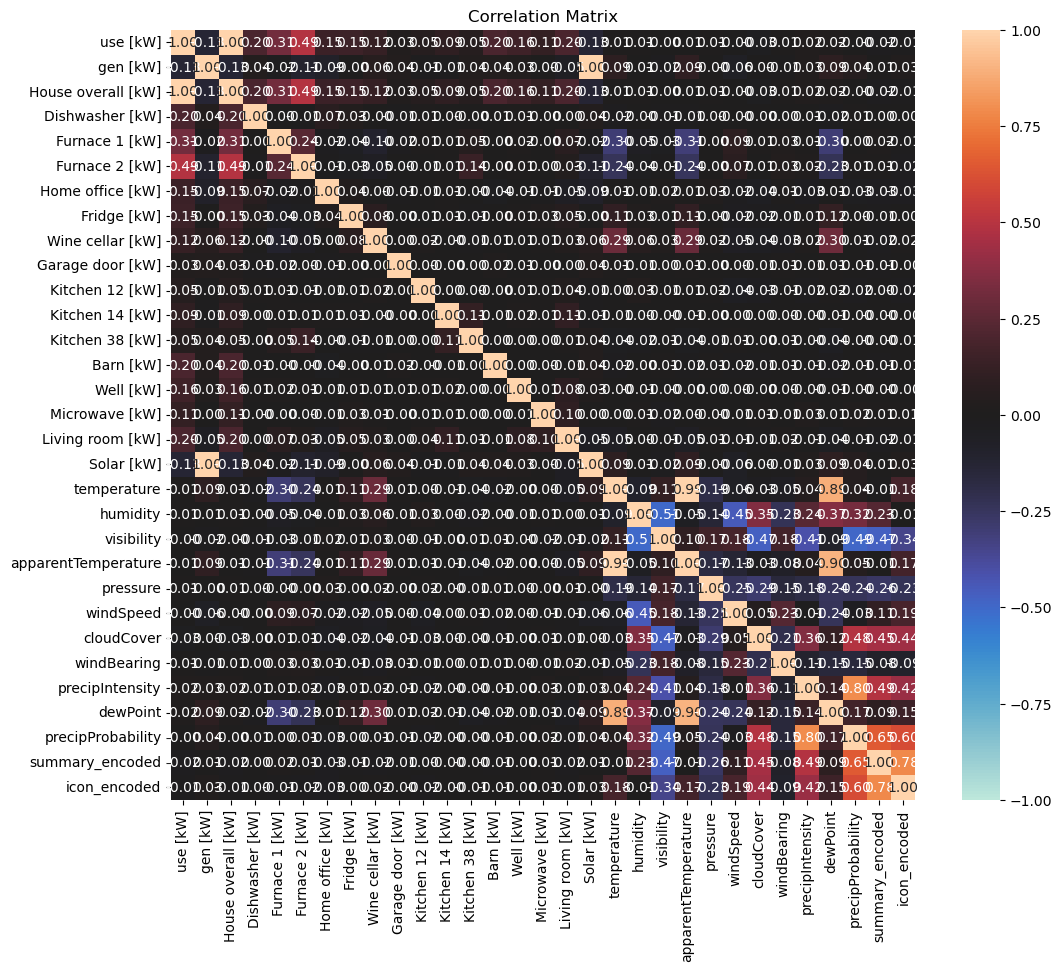

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Correlation Matrix')
plt.show()

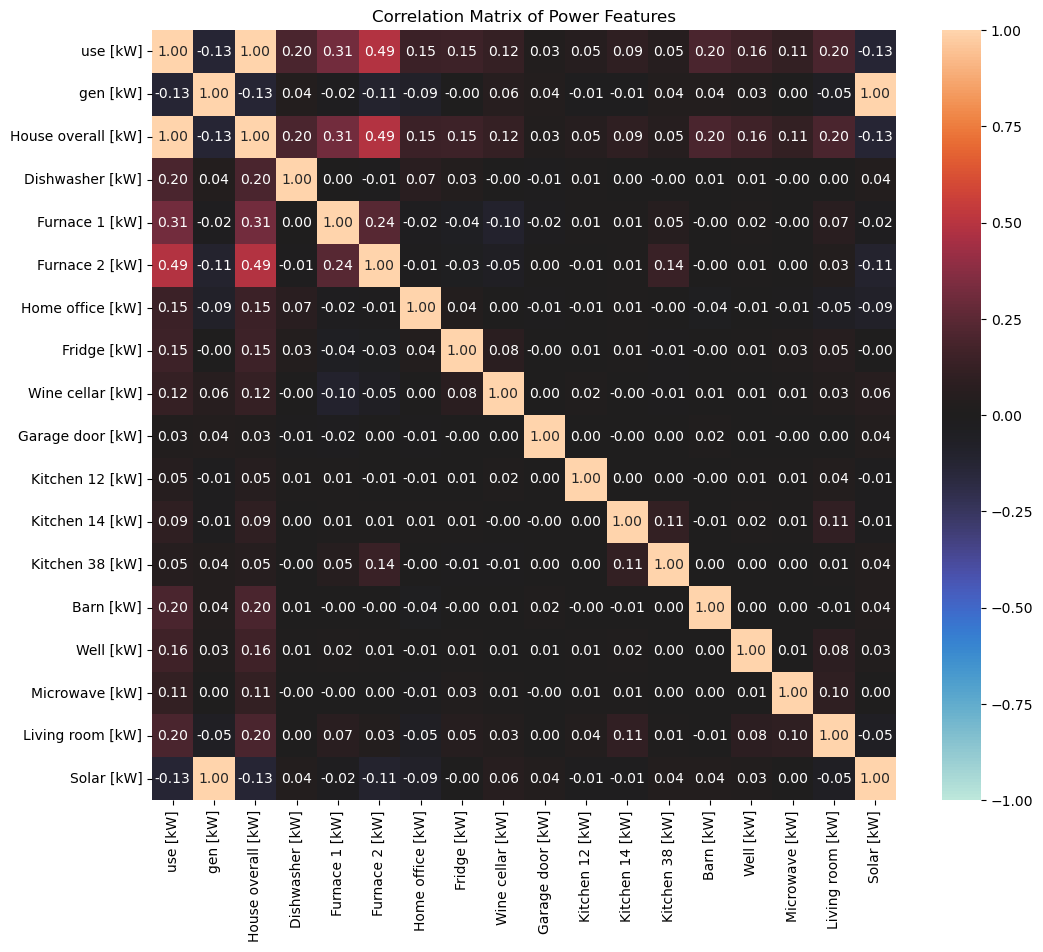

In [79]:
# Show correlation of just the power features
plt.figure(figsize=(12,10))
sns.heatmap(df[power_array].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Correlation Matrix of Power Features')
plt.show()

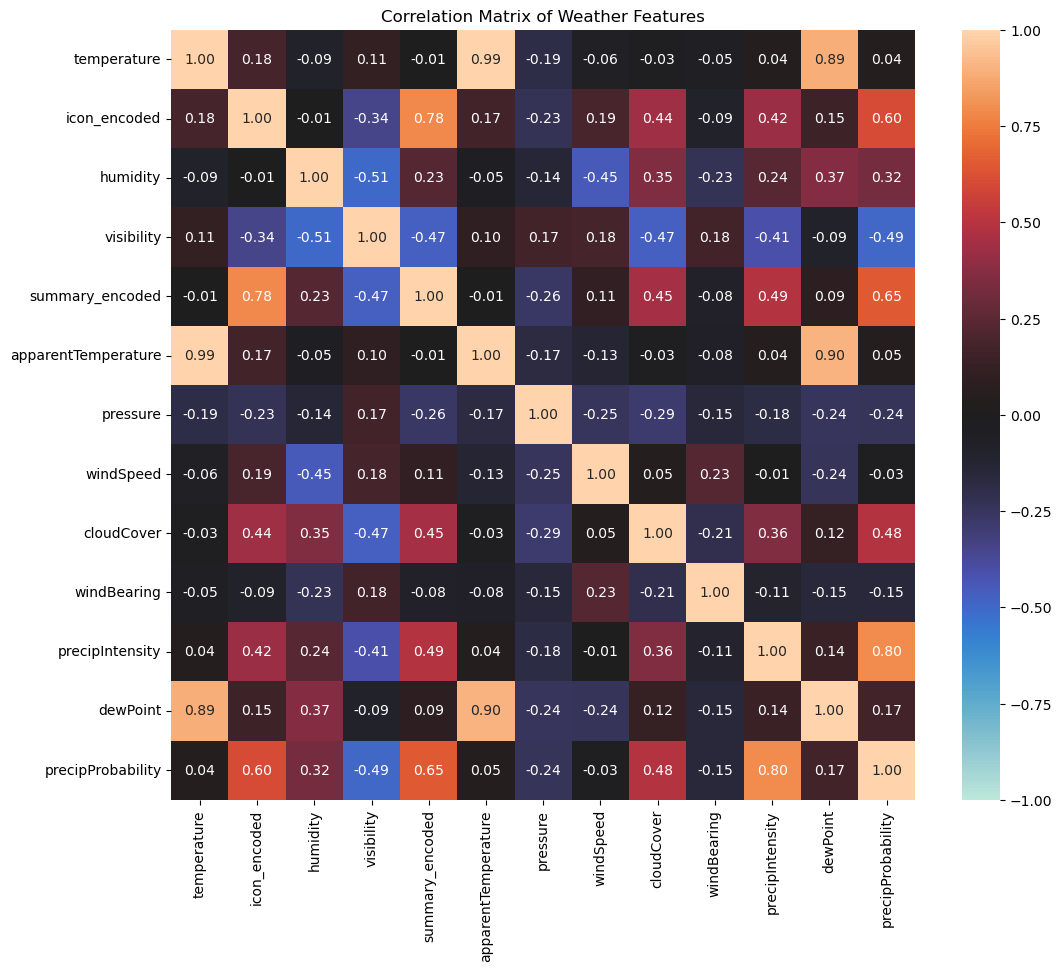

In [80]:
# Show correlation of just weather features
plt.figure(figsize=(12,10))
sns.heatmap(df[weather_array].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Correlation Matrix of Weather Features')
plt.show()

# Check to see if use/House overall and gen/solar are identical

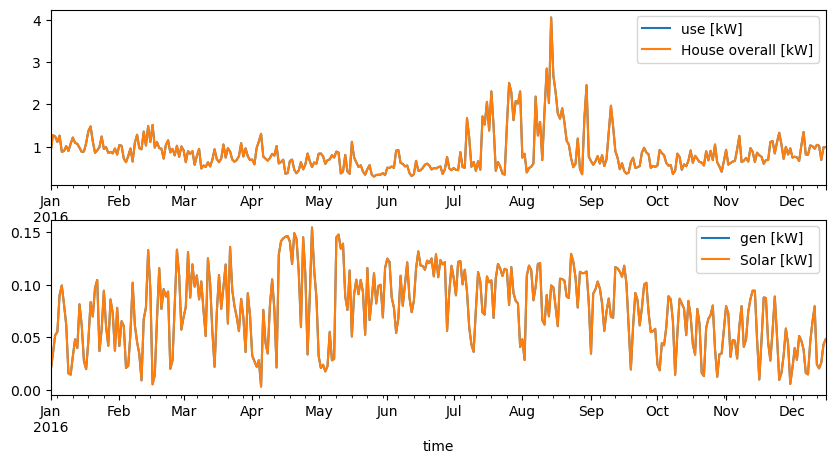

In [81]:
#They are indeed the same df (overlaping perfectly)
fig, axes = plt.subplots(2,1, figsize=(10,5))
df[['use [kW]','House overall [kW]']].resample('D').mean().plot(ax=axes[0])
df[['gen [kW]','Solar [kW]']].resample('D').mean().plot(ax=axes[1]);

# Visualize the weather correlations

<Axes: xlabel='time'>

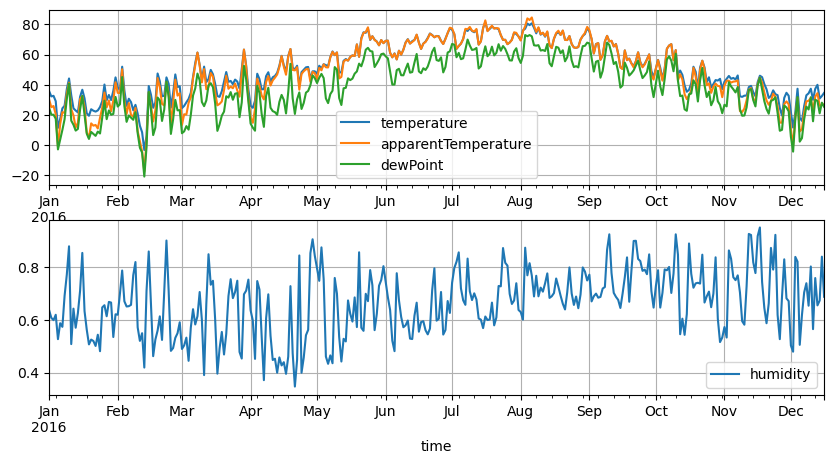

In [82]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
df[['temperature','apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
df[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)

# Visualizations

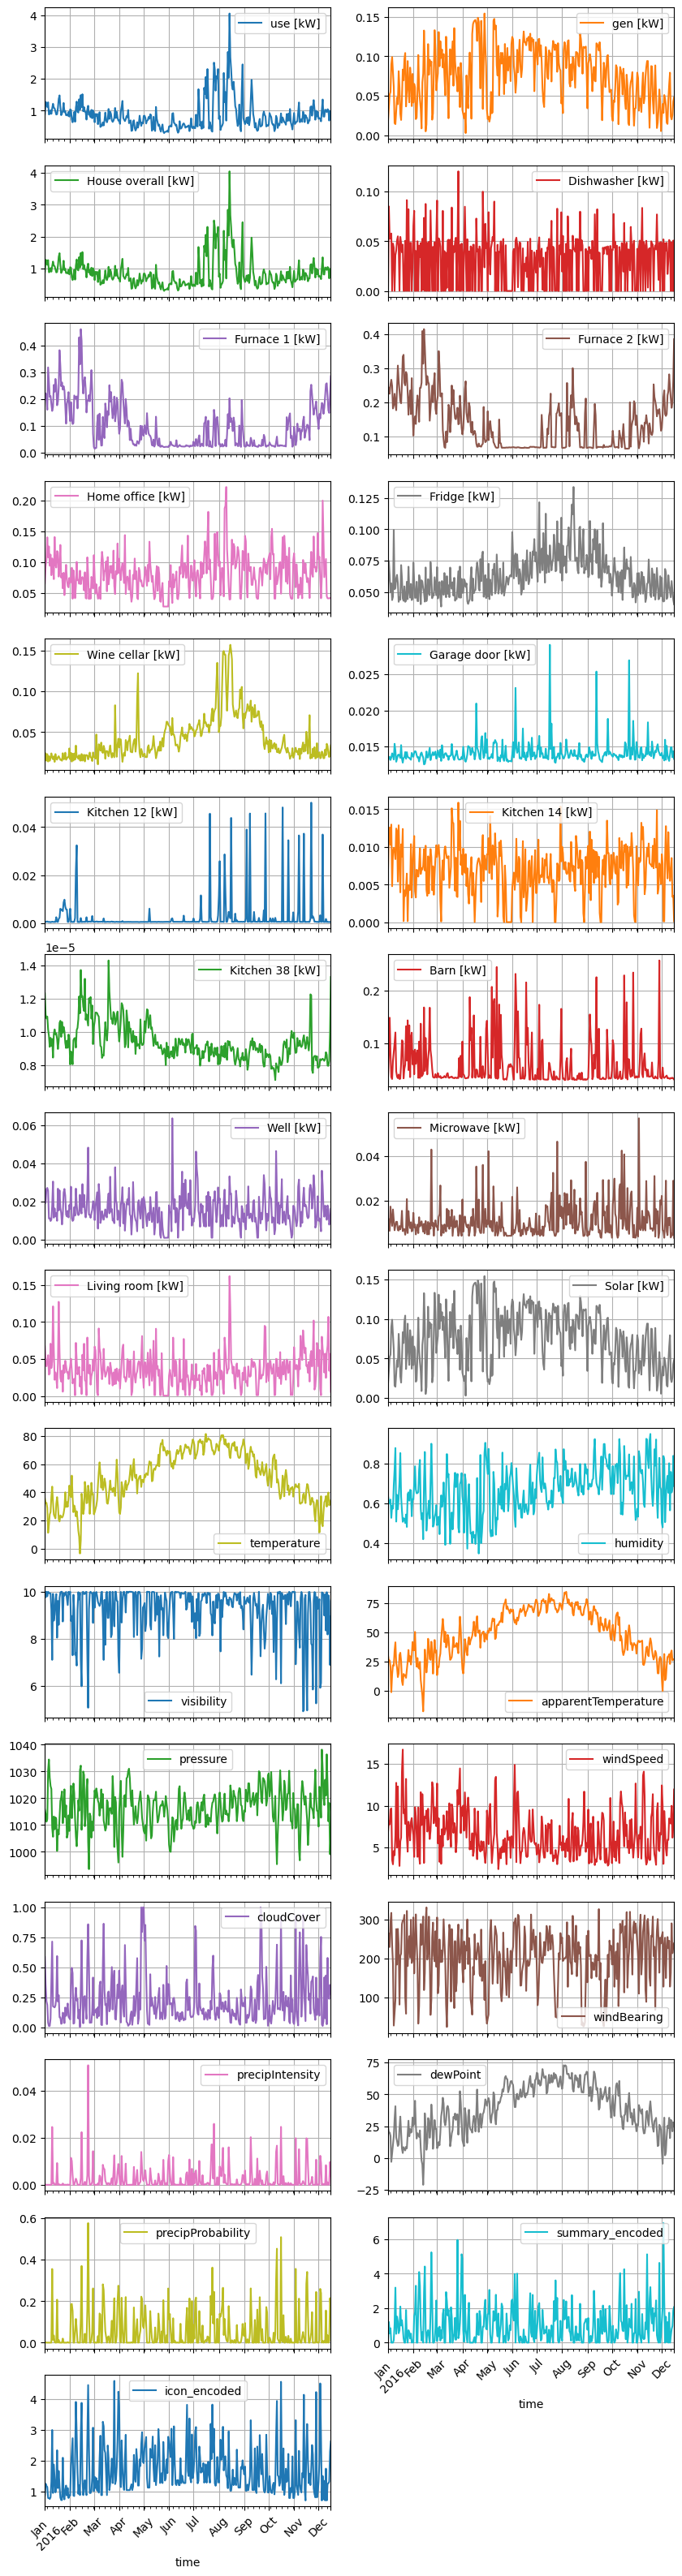

In [83]:
df.resample("D").mean().plot(subplots=True, layout=(-1, 2), figsize=(10, 40), grid=True, rot=45);

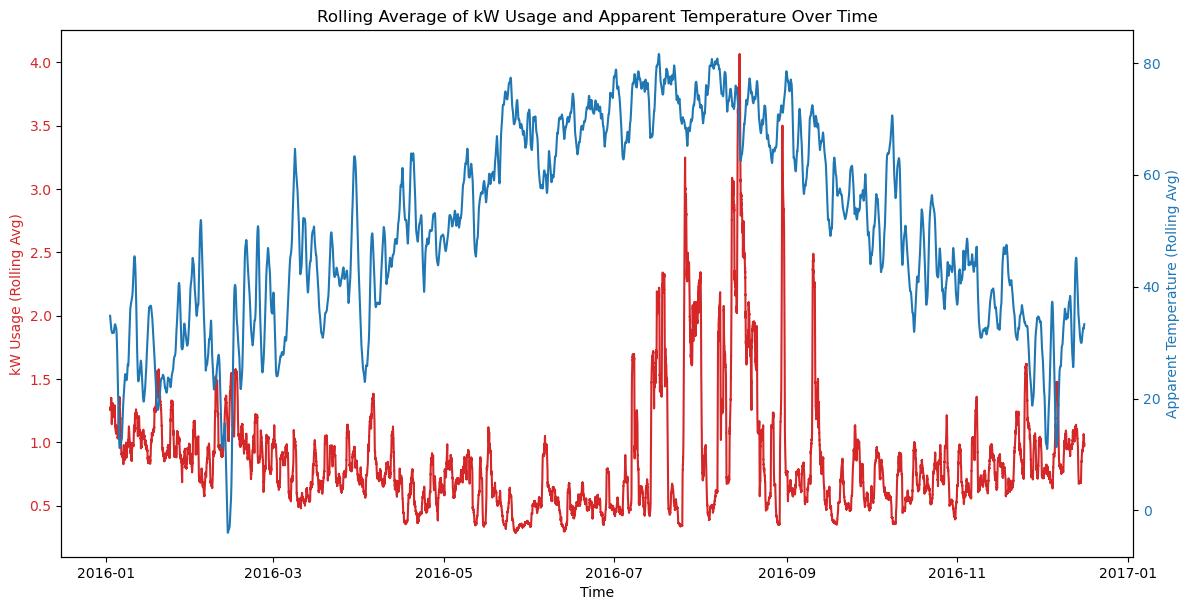

In [84]:
window_size = 60*24

# Calculate rolling averages
df['use [kW]_rolling_avg'] = df['use [kW]'].rolling(window=window_size).mean()
df['temperature_rolling_avg'] = df['temperature'].rolling(window=window_size).mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('kW Usage (Rolling Avg)', color=color)
ax1.plot(df.index, df['use [kW]_rolling_avg'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Apparent Temperature (Rolling Avg)', color=color)  
ax2.plot(df.index, df['temperature_rolling_avg'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Rolling Average of kW Usage and Apparent Temperature Over Time')
plt.show()

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

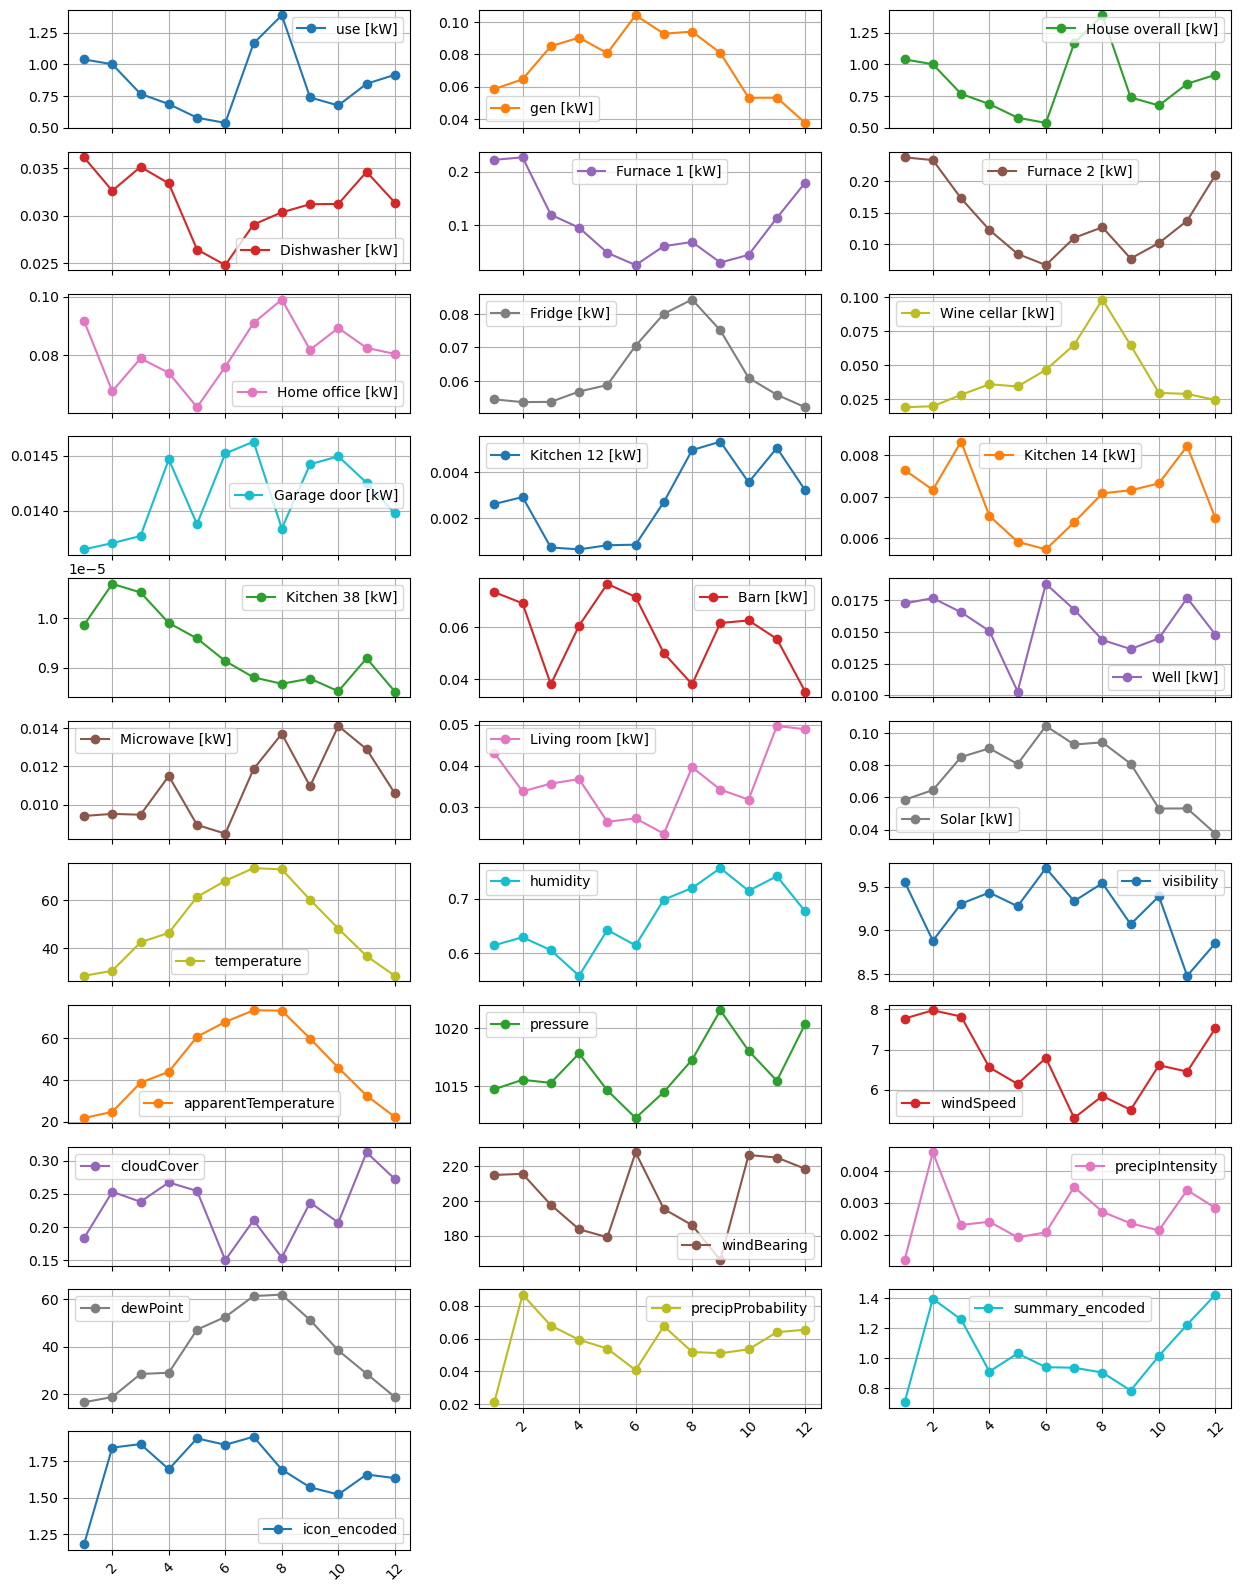

In [85]:
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['hour'] = df.index.hour
df['minute'] = df.index.minute

##Averge consuption per month
mean_month = df.groupby('month').agg({col: 'mean' for col in df.columns if col in all_columns})
num_columns = len(mean_month.columns)
num_rows = -1
columns_per_row = 3
mean_month.plot(subplots=True, layout=(num_rows, columns_per_row), figsize=(15, 20),
                grid=True, rot=45, xlabel='', marker='o')

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

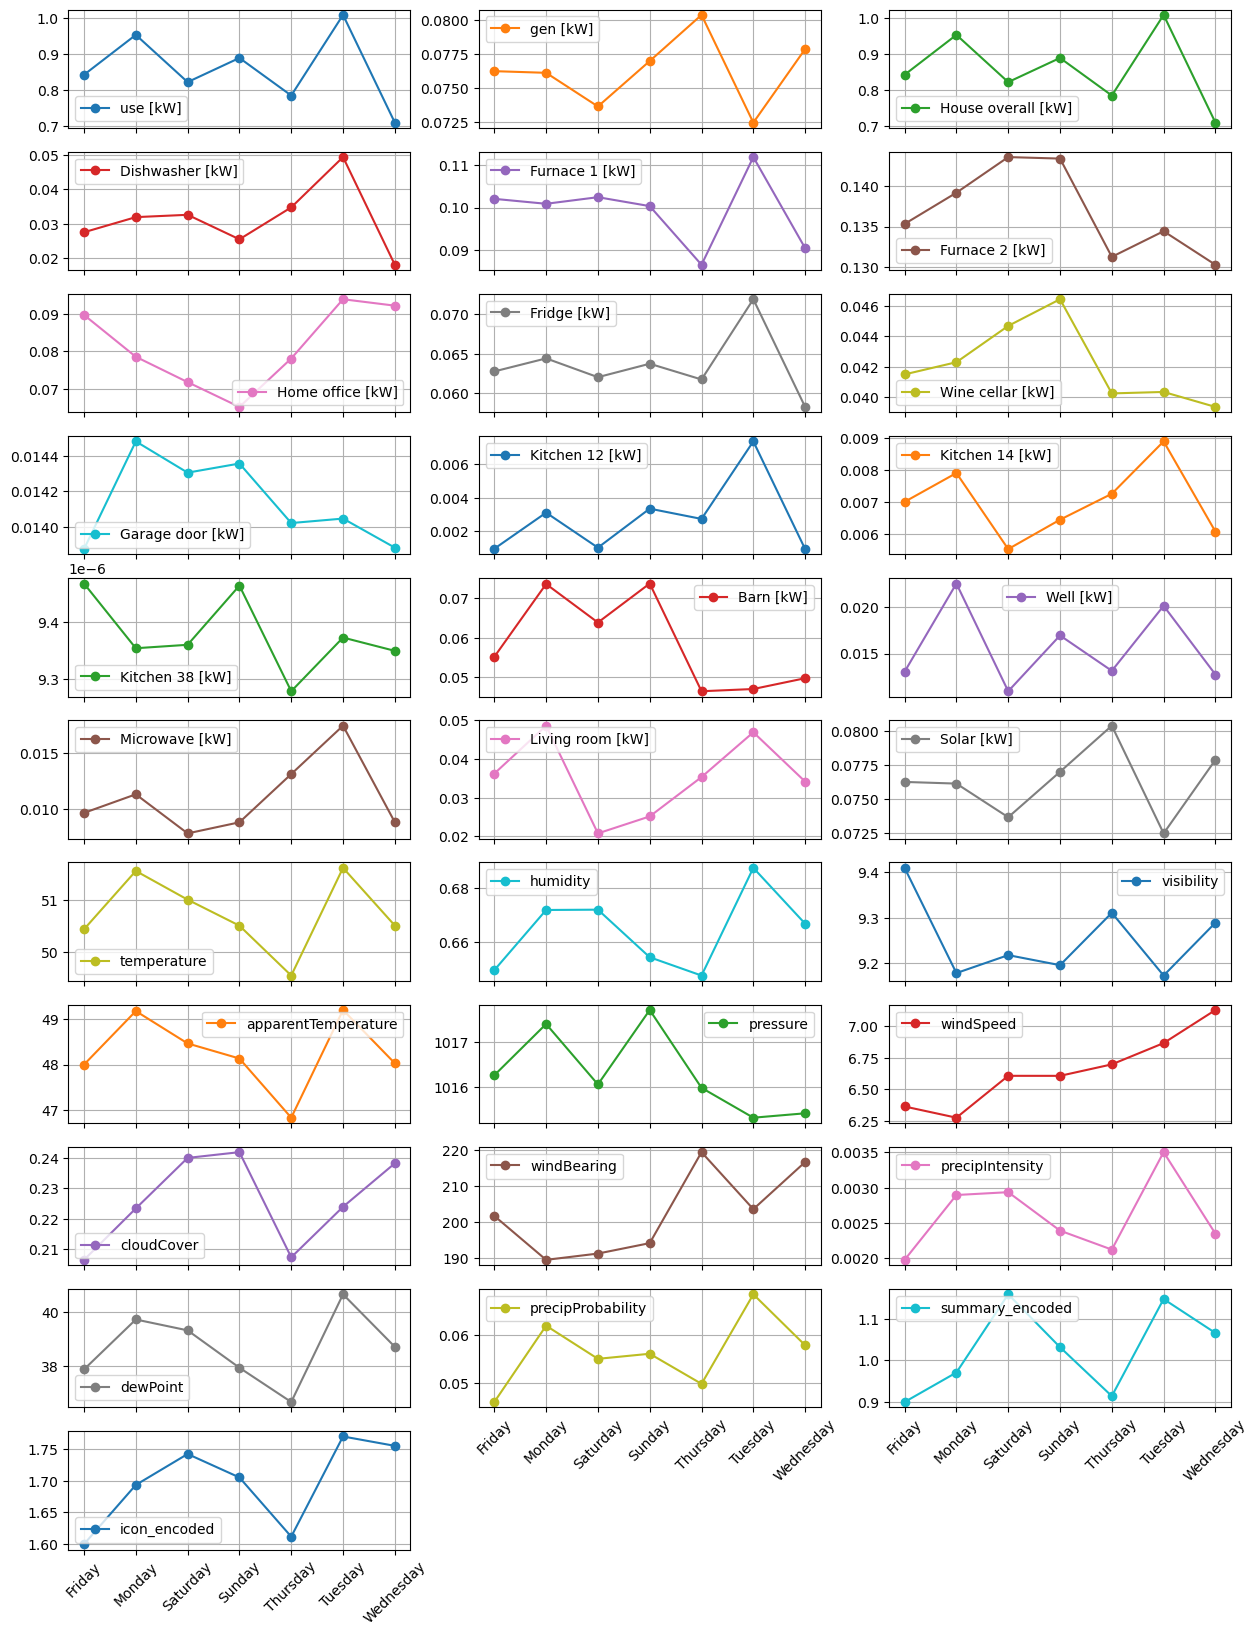

In [86]:
#Averge consuption per day of the week
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = df.groupby('weekday').agg({col: 'mean' for col in df.columns if col in all_columns})
num_columns = len(mean_weekday.columns)
num_rows = -1
columns_per_row = 3
mean_weekday.plot(subplots=True, layout=(num_rows, columns_per_row), figsize=(15, 20),
                grid=True, rot=45, xlabel='', marker='o')

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

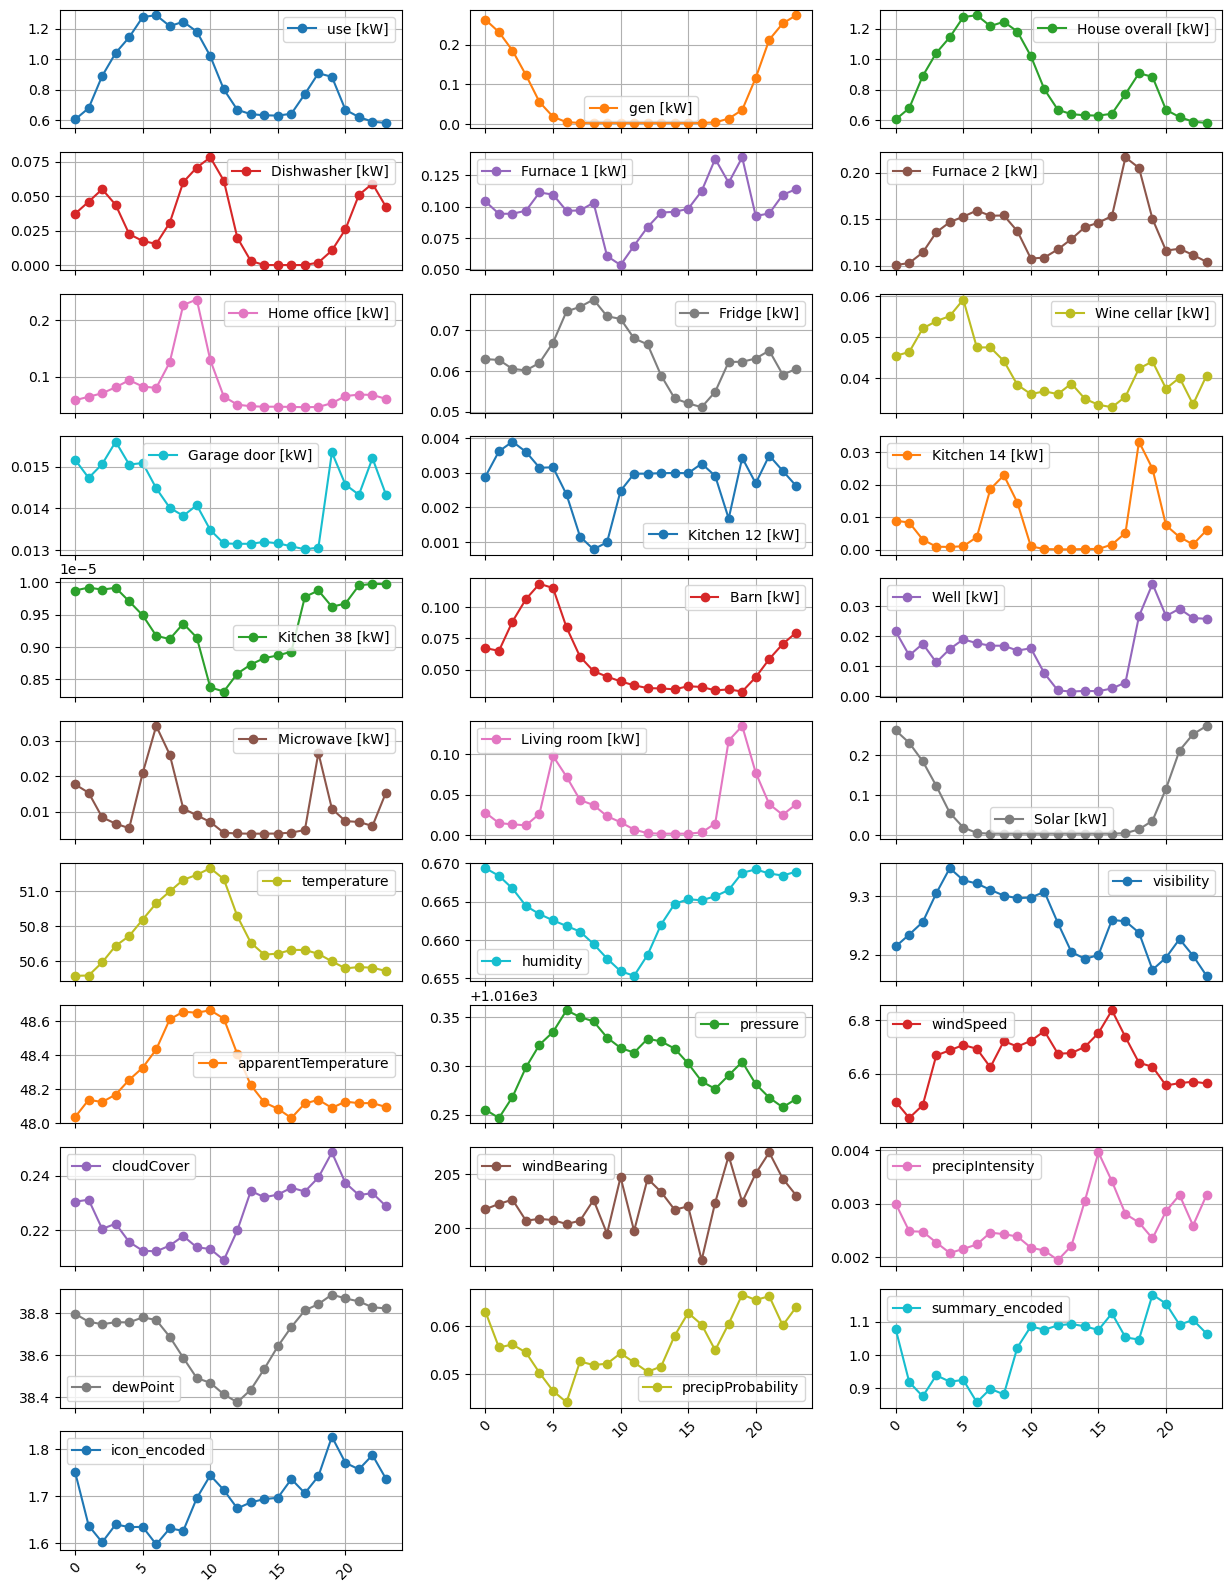

In [87]:
#Averge consuption per hour
mean_hour = df.groupby('hour').agg({col: 'mean' for col in df.columns if col in all_columns})
num_columns = len(mean_hour.columns)
num_rows = -1
columns_per_row = 3
mean_hour.plot(subplots=True, layout=(num_rows, columns_per_row), figsize=(15, 20),
                grid=True, rot=45, xlabel='', marker='o')

<Axes: xlabel='time'>

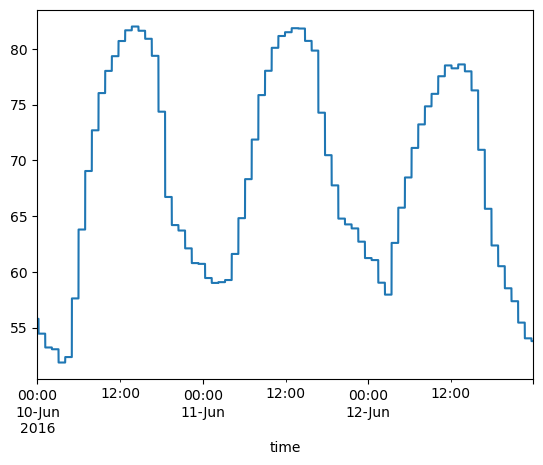

In [89]:
# plot temperature
df['2016-06-10':'2016-06-12']['temperature'].plot()
